<a href="https://colab.research.google.com/github/saiteja1522/job-finder-app/blob/main/Project_MODEL_BUILDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [279]:
df=pd.read_csv('final_data.csv')

In [280]:
df.head()

,Unnamed: 0,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,URL
0,0,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
1,1,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
2,2,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
3,3,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...
4,4,Accenture,5-8 Yrs,1 Day Ago,Mumbai,4.2,(30336 Reviews),Not disclosed,Due diligence,Senior Analyst-Finance Processes and Operations,https://www.naukri.com/job-listings-senior-ana...


In [281]:
df.columns

Index(['Unnamed: 0', 'Company', 'Experience', 'Job_Post_History', 'Location',
       'Ratings', 'Reviews', 'Salary', 'Skills', 'Title', 'URL'],
      dtype='object')

In [282]:
df.shape

(560, 11)

In [283]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
Experience,0
Job_Post_History,0
Location,0
Ratings,0
Reviews,0
Salary,0
Skills,0
Title,0


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        560 non-null    int64  
 1   Company           560 non-null    object 
 2   Experience        560 non-null    object 
 3   Job_Post_History  560 non-null    object 
 4   Location          560 non-null    object 
 5   Ratings           560 non-null    float64
 6   Reviews           560 non-null    object 
 7   Salary            560 non-null    object 
 8   Skills            560 non-null    object 
 9   Title             560 non-null    object 
 10  URL               560 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.3+ KB


In [285]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
555,False
556,False
557,False
558,False


In [286]:
df.duplicated().sum()

np.int64(0)

In [287]:
df.describe()

,Unnamed: 0,Ratings
count,560.000000,560.000000
mean,279.500000,4.053571
std,161.802349,0.452765
min,0.000000,1.600000
25%,139.750000,3.900000
50%,279.500000,4.200000
75%,419.250000,4.200000
max,559.000000,4.700000


In [288]:
# Clean 'Experience' column and extract min/max/avg
def clean_experience(exp):
    if pd.isna(exp) or exp == '':
        return 0, 0, 0
    try:
        min_exp, max_exp = map(int, exp.replace(' Yrs', '').split('-'))
        avg_exp = (min_exp + max_exp) / 2
        return min_exp, max_exp, avg_exp
    except:
        return 0, 0, 0

df[['Experience_Min', 'Experience_Max', 'Experience_Avg']] = df['Experience'].apply(clean_experience).apply(pd.Series)


In [289]:
# Clean 'Salary' column and extract min/max/avg
def clean_salary(salary):
    if salary == 'Not disclosed' or pd.isna(salary):
        return 0, 0, 0
    try:
        salary = salary.replace(' PA.', '').replace(',', '')
        min_sal, max_sal = map(int, salary.split('-'))
        avg_sal = (min_sal + max_sal) / 2
        return min_sal, max_sal, avg_sal
    except:
        return 0, 0, 0

df[['Salary_Min', 'Salary_Max', 'Salary_Avg']] = df['Salary'].apply(clean_salary).apply(pd.Series)

In [290]:
# Clean 'Reviews' column
df['Reviews'] = df['Reviews'].str.replace(r'\D', '', regex=True).astype(int)

In [291]:
# Remove duplicates based on key columns
df = df.drop_duplicates(subset=['Company', 'Title', 'Location', 'Experience', 'URL'])

In [292]:
# prompt: drop url and unnamed column

df = df.drop(['Unnamed: 0','URL'],axis=1)


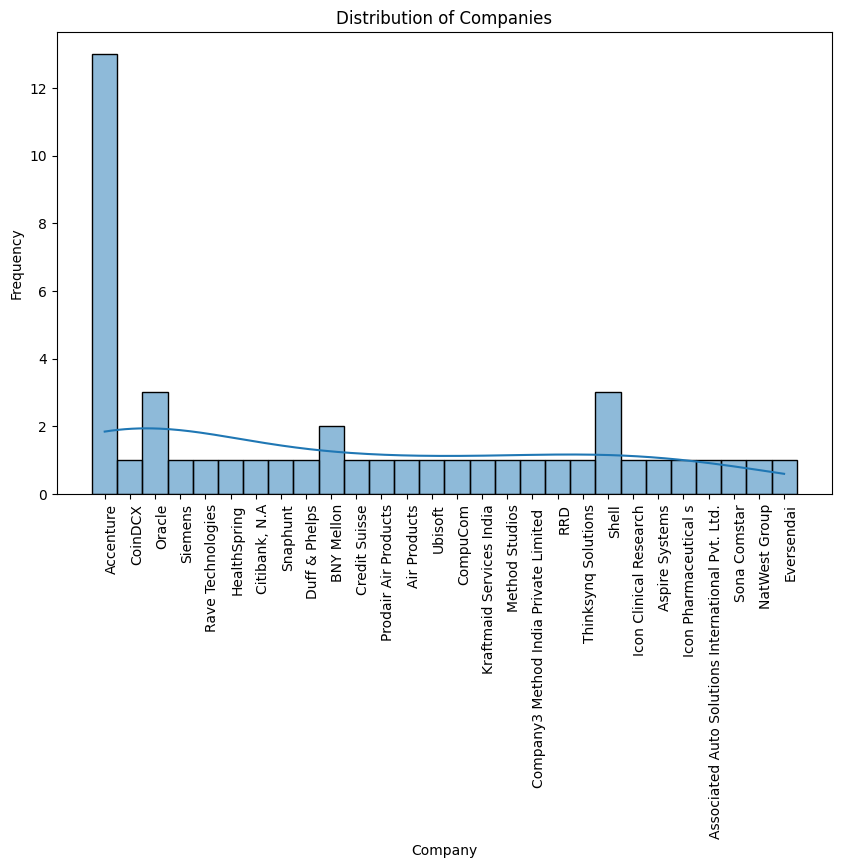

In [293]:
# hist for the company plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Company'], kde=True)
plt.title('Distribution of Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='left')
plt.show()


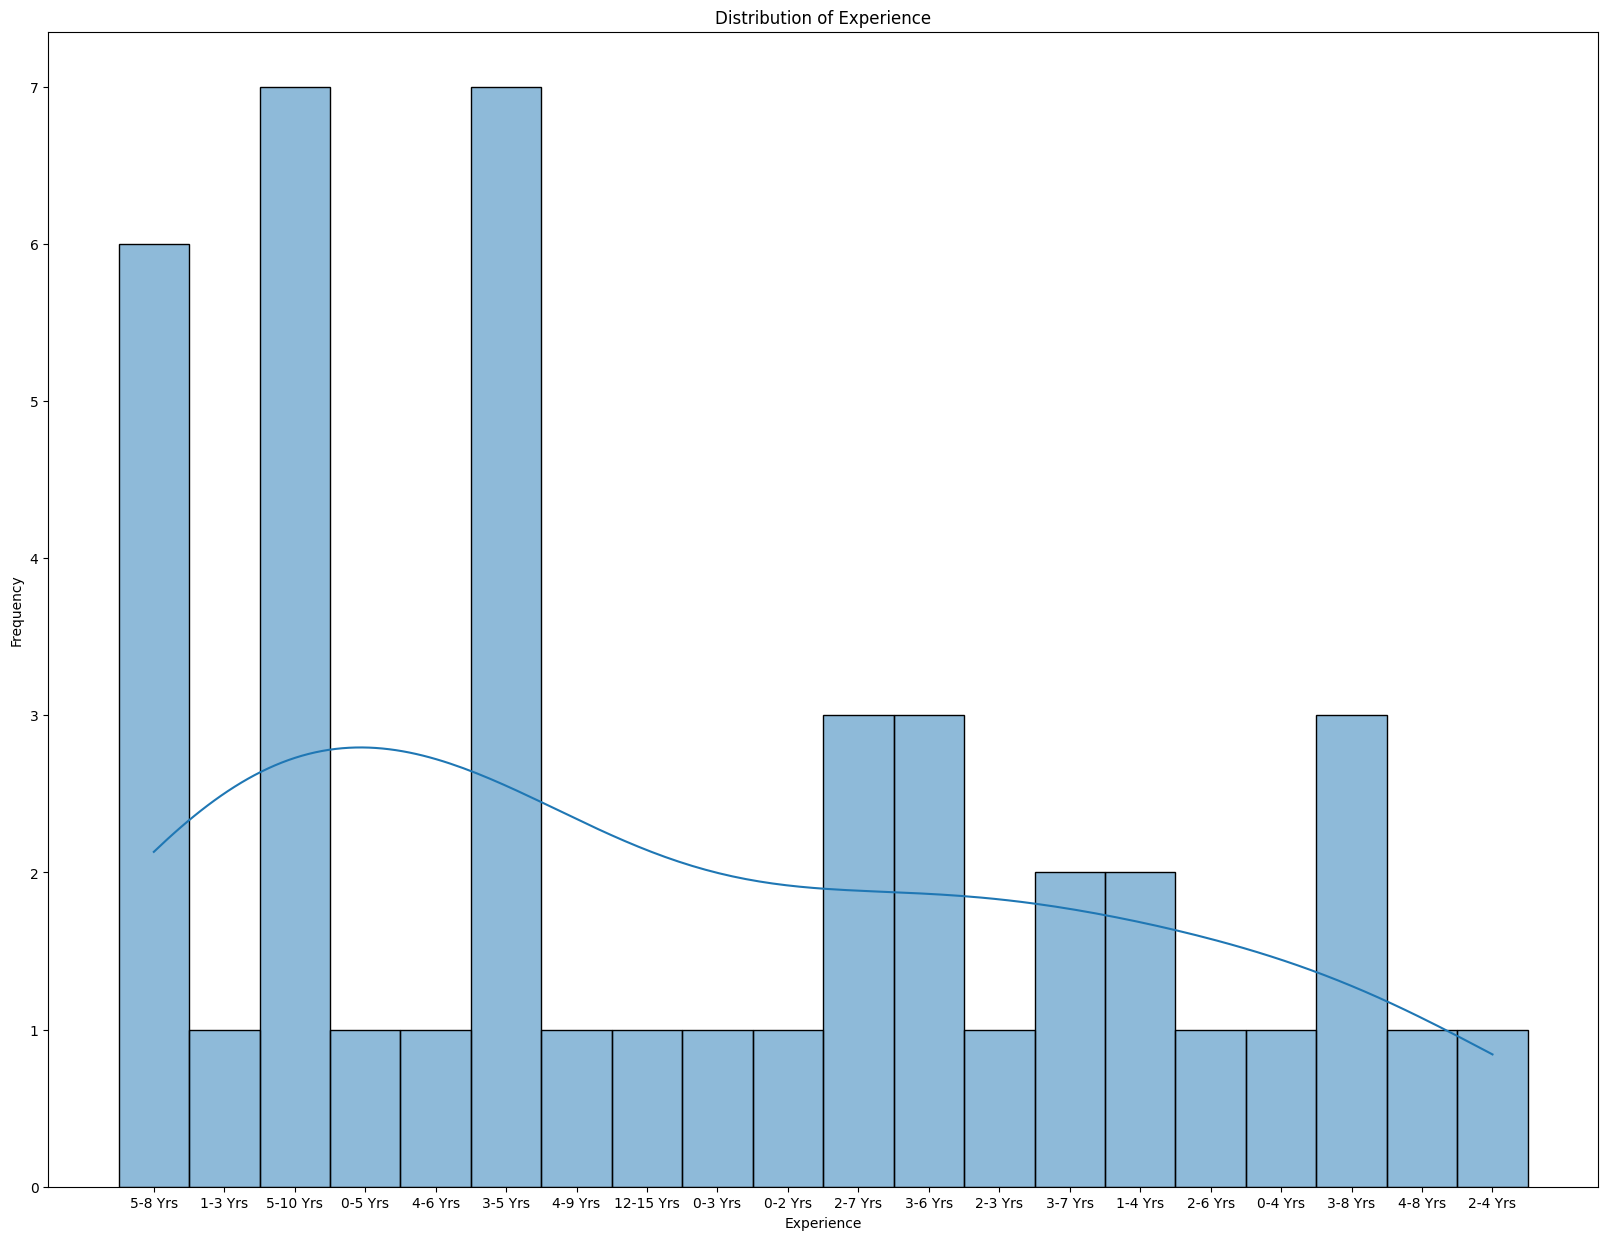

In [294]:
# hist for the 'experice' column
plt.figure(figsize=(20, 15))
sns.histplot(df['Experience'], kde=True)  # Use kde=True for a kernel density estimate curve
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()


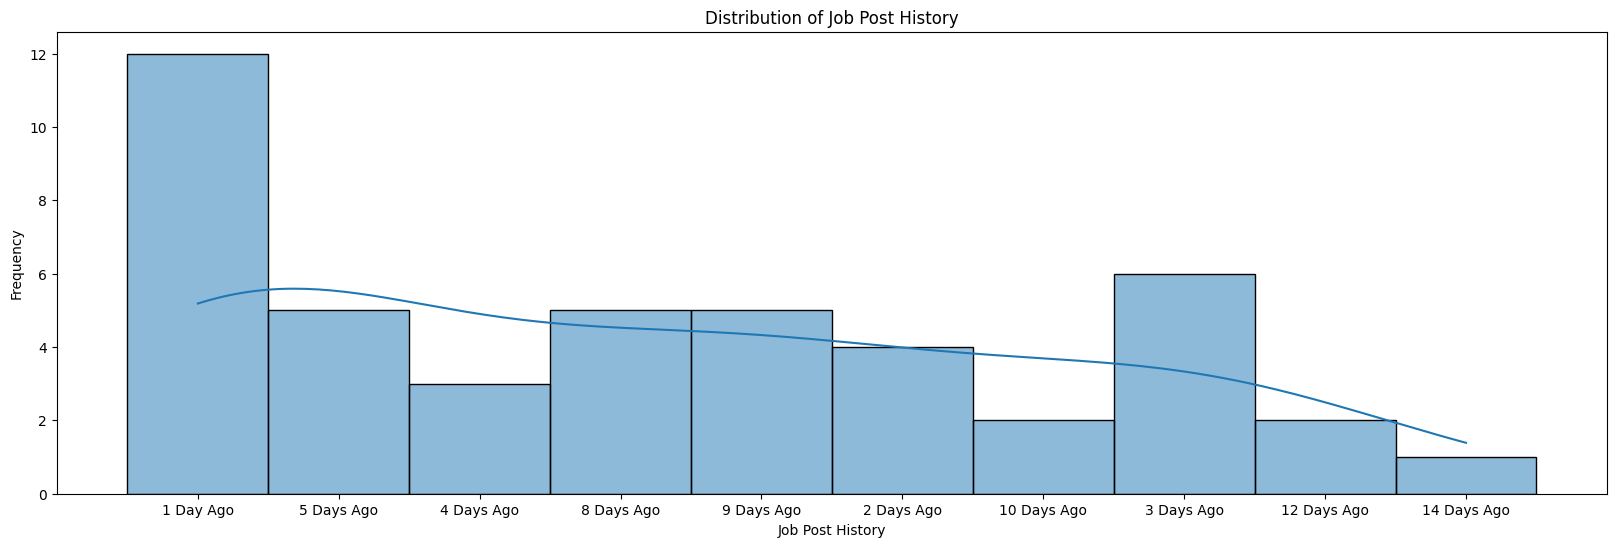

In [295]:
# hist for the'JobPostHistory' is a column
plt.figure(figsize=(20, 6))
sns.histplot(df['Job_Post_History'], kde=True)
plt.title('Distribution of Job Post History')
plt.xlabel('Job Post History')
plt.ylabel('Frequency')
plt.show()


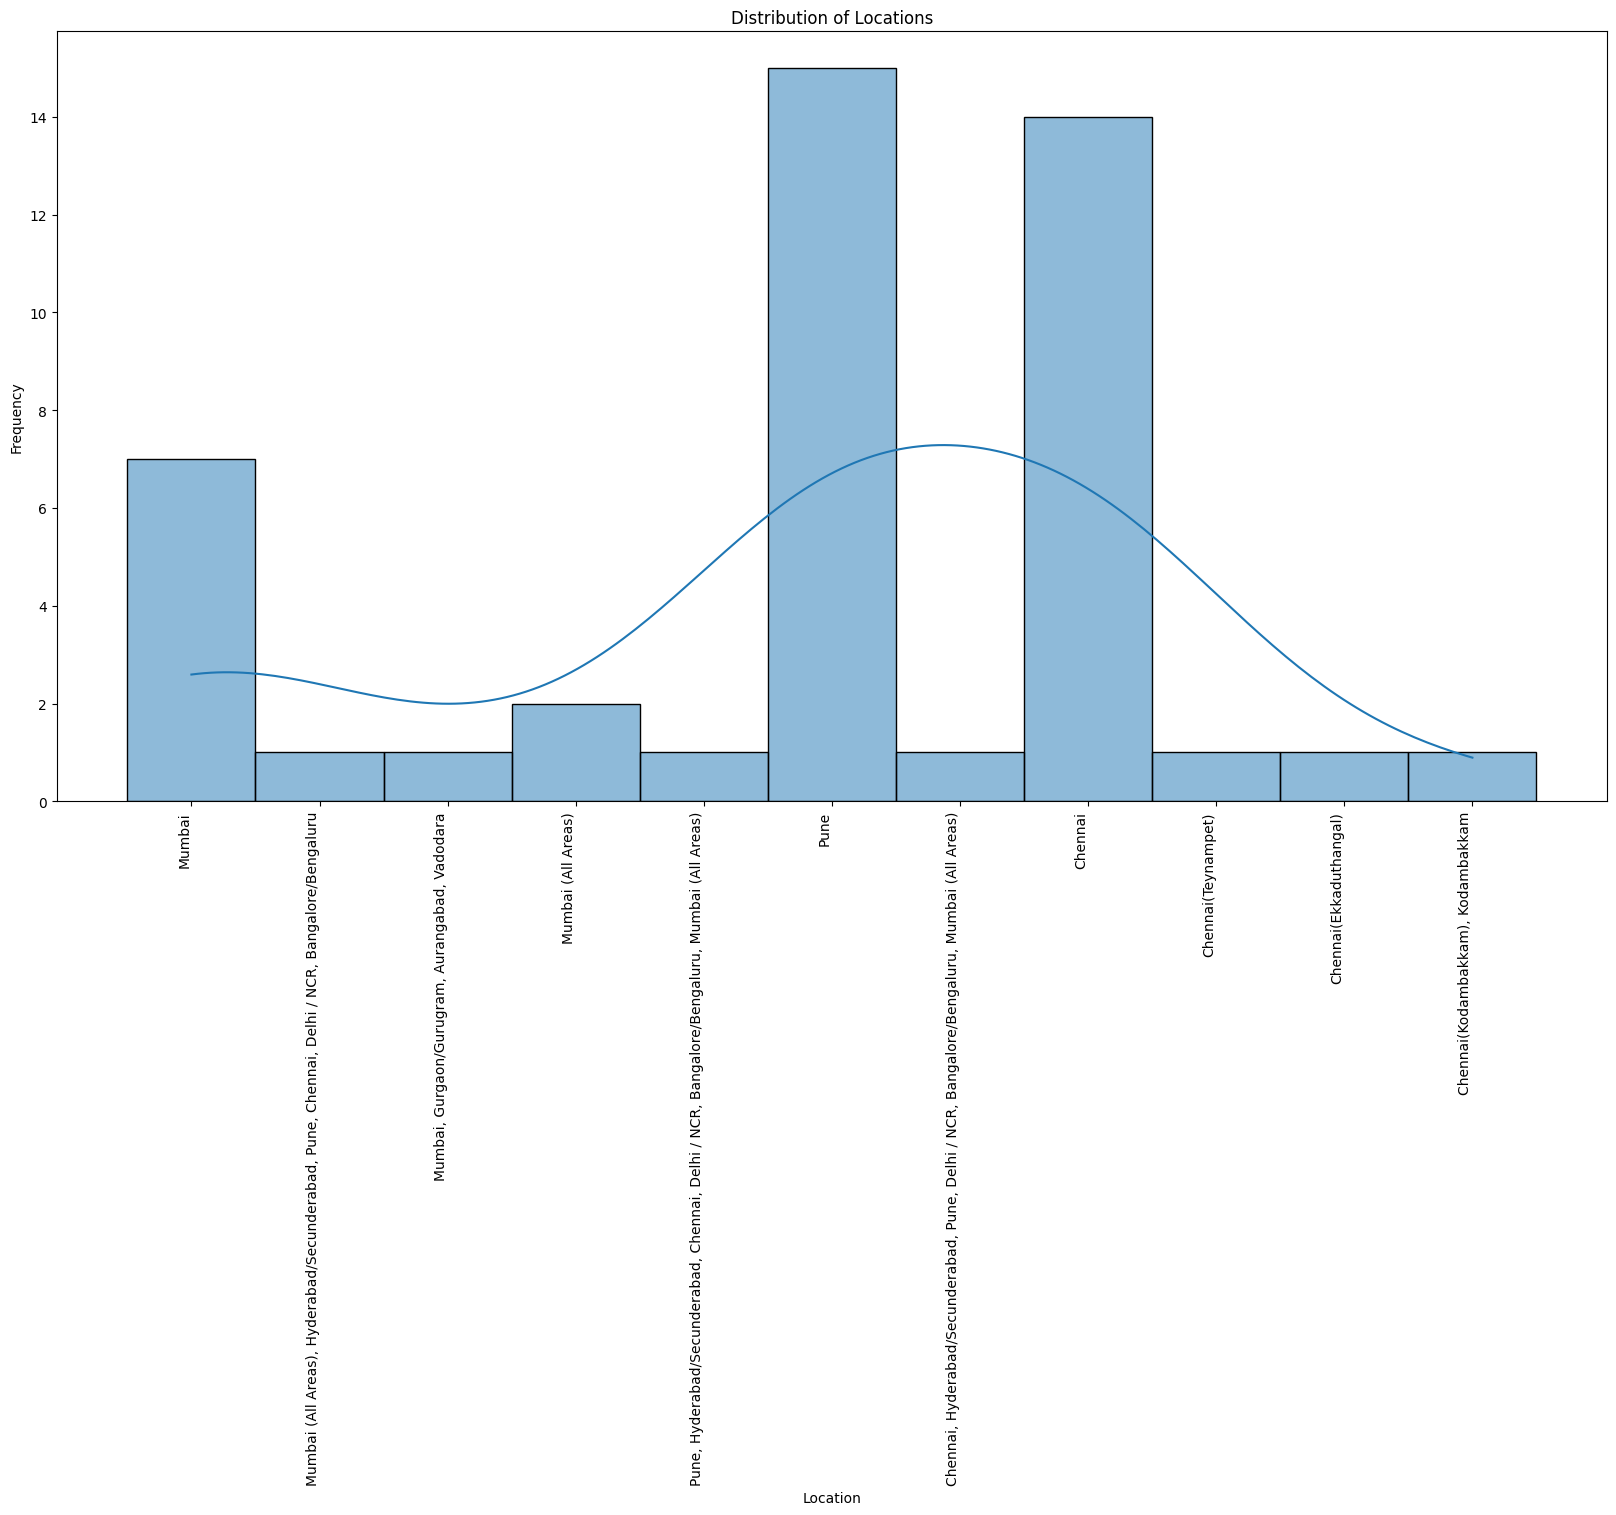

In [296]:
# hist for the 'Location' is column
plt.figure(figsize=(20, 10))
sns.histplot(df['Location'], kde=True)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


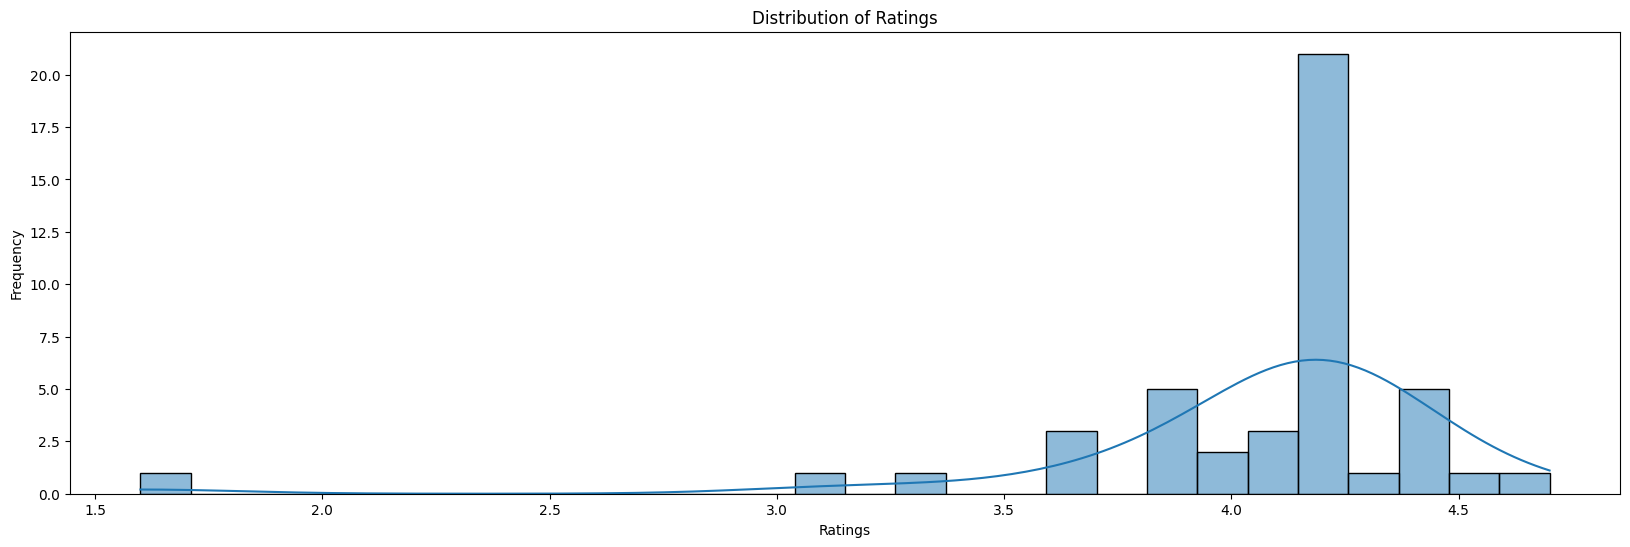

In [297]:
# hist for the  'Ratings' is a column
plt.figure(figsize=(20, 6))
sns.histplot(df['Ratings'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


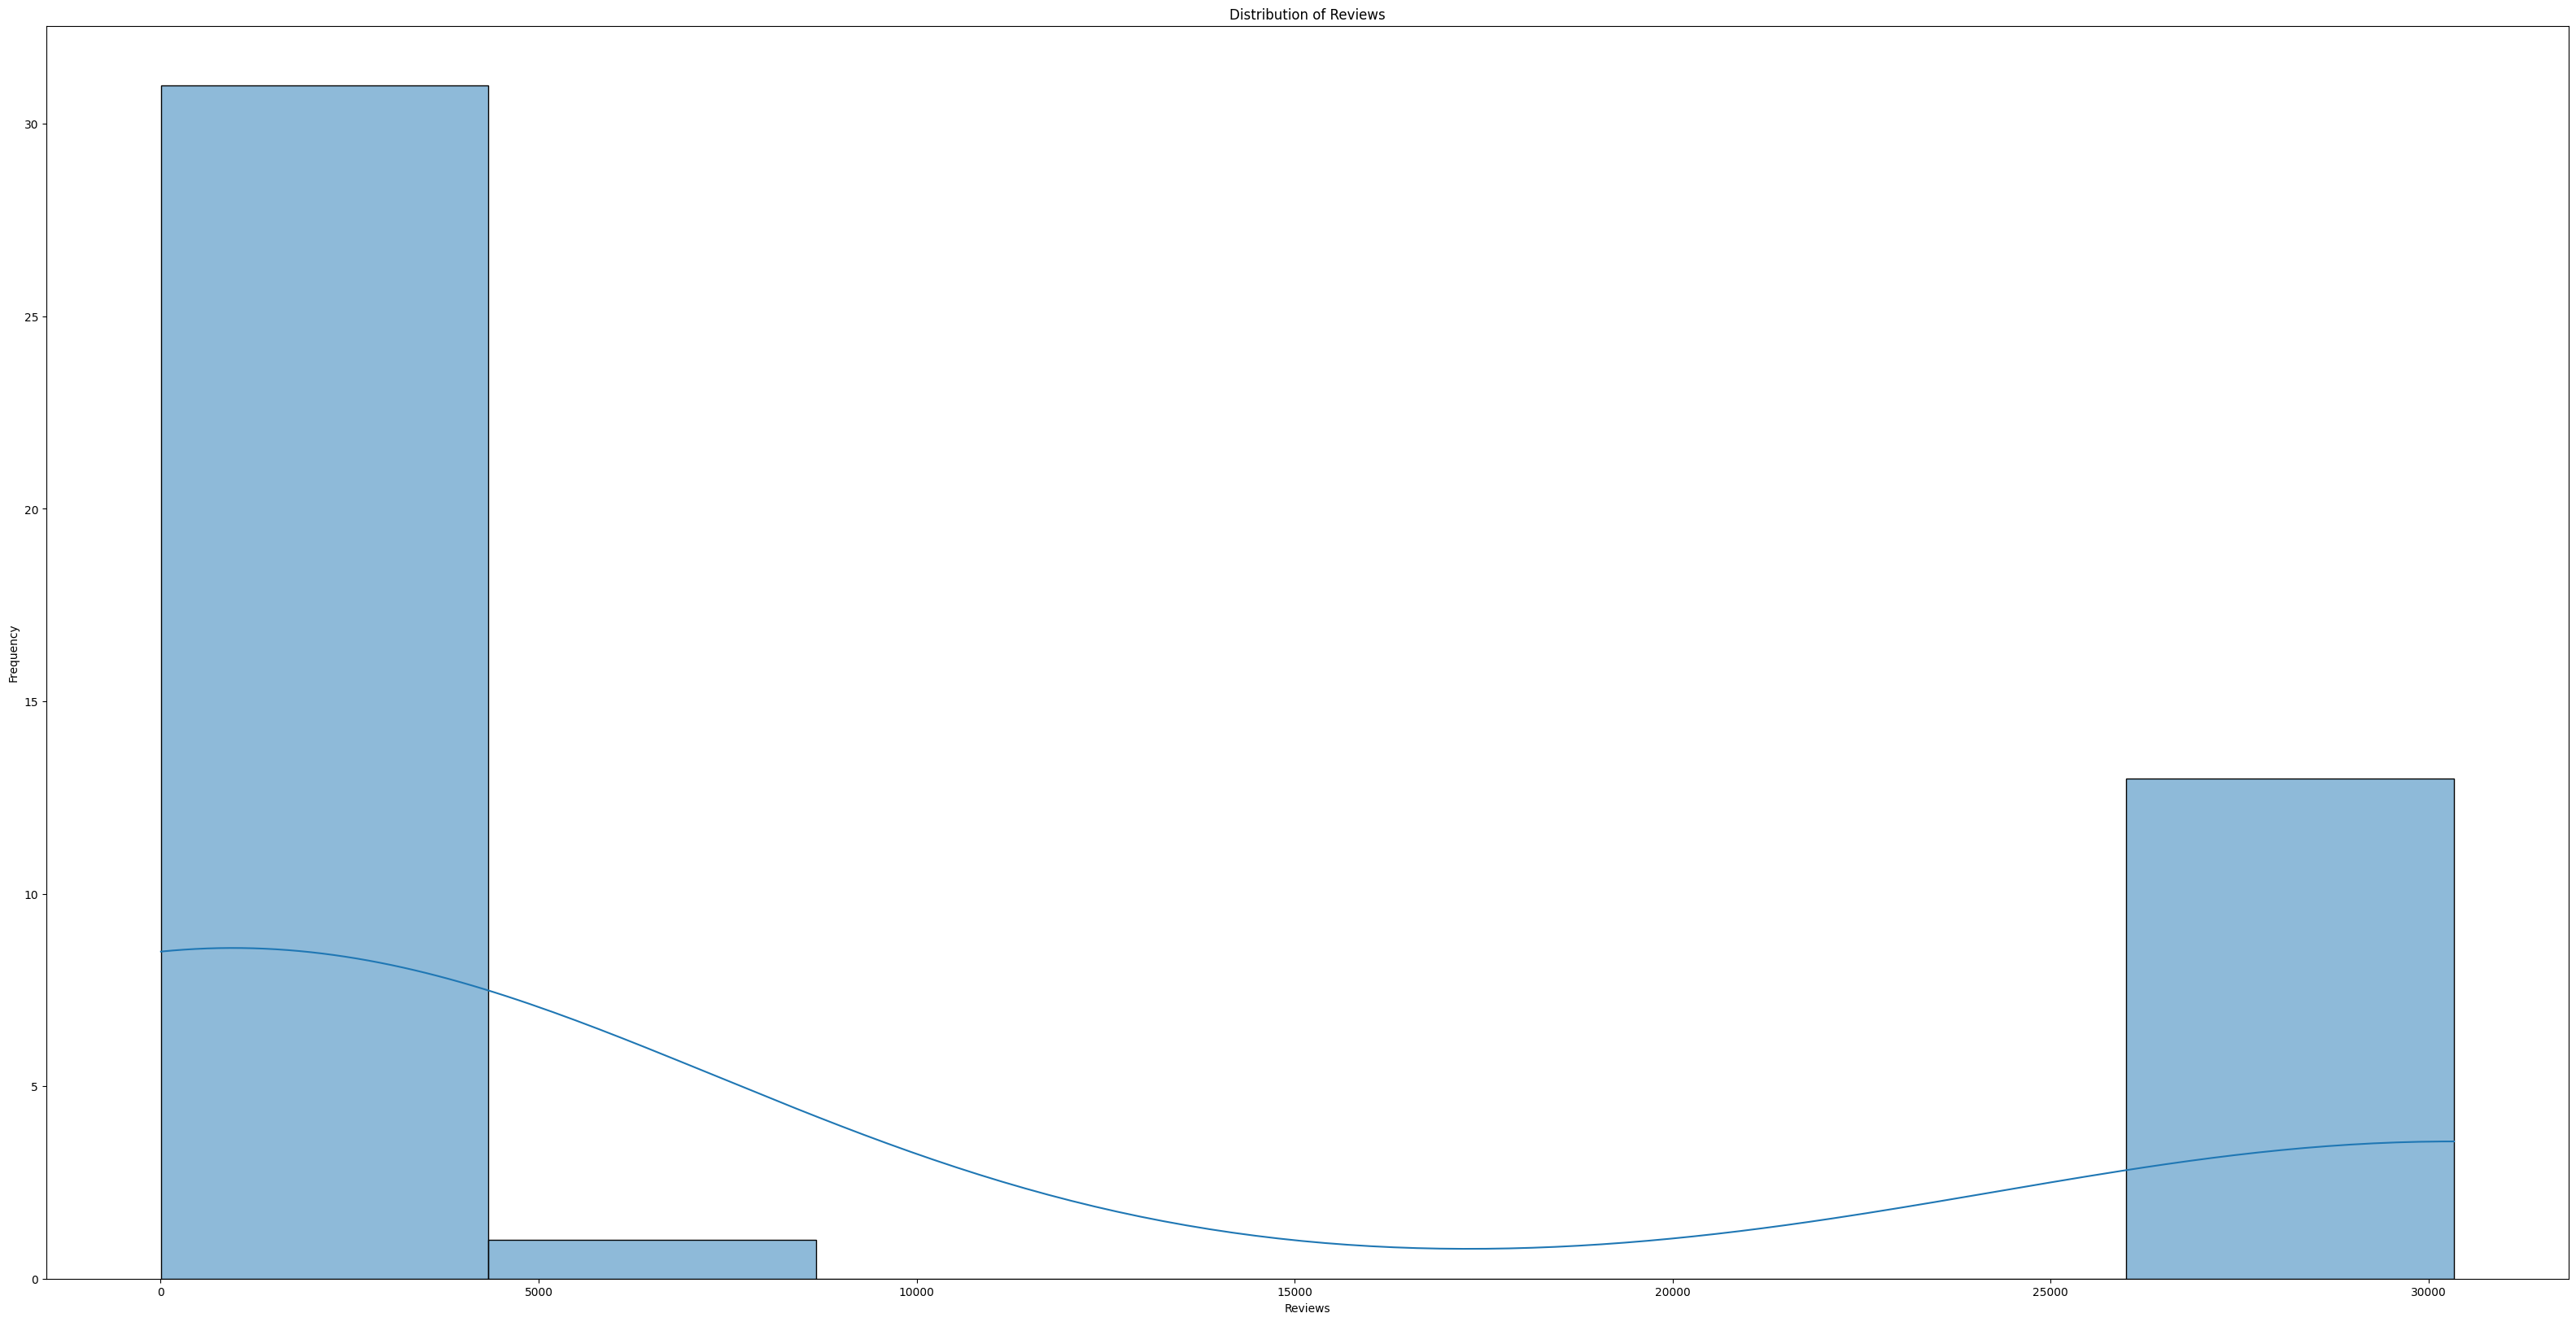

In [298]:
# hist for the 'Reviews' is a column
plt.figure(figsize=(40,20))
sns.histplot(df['Reviews'], kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()



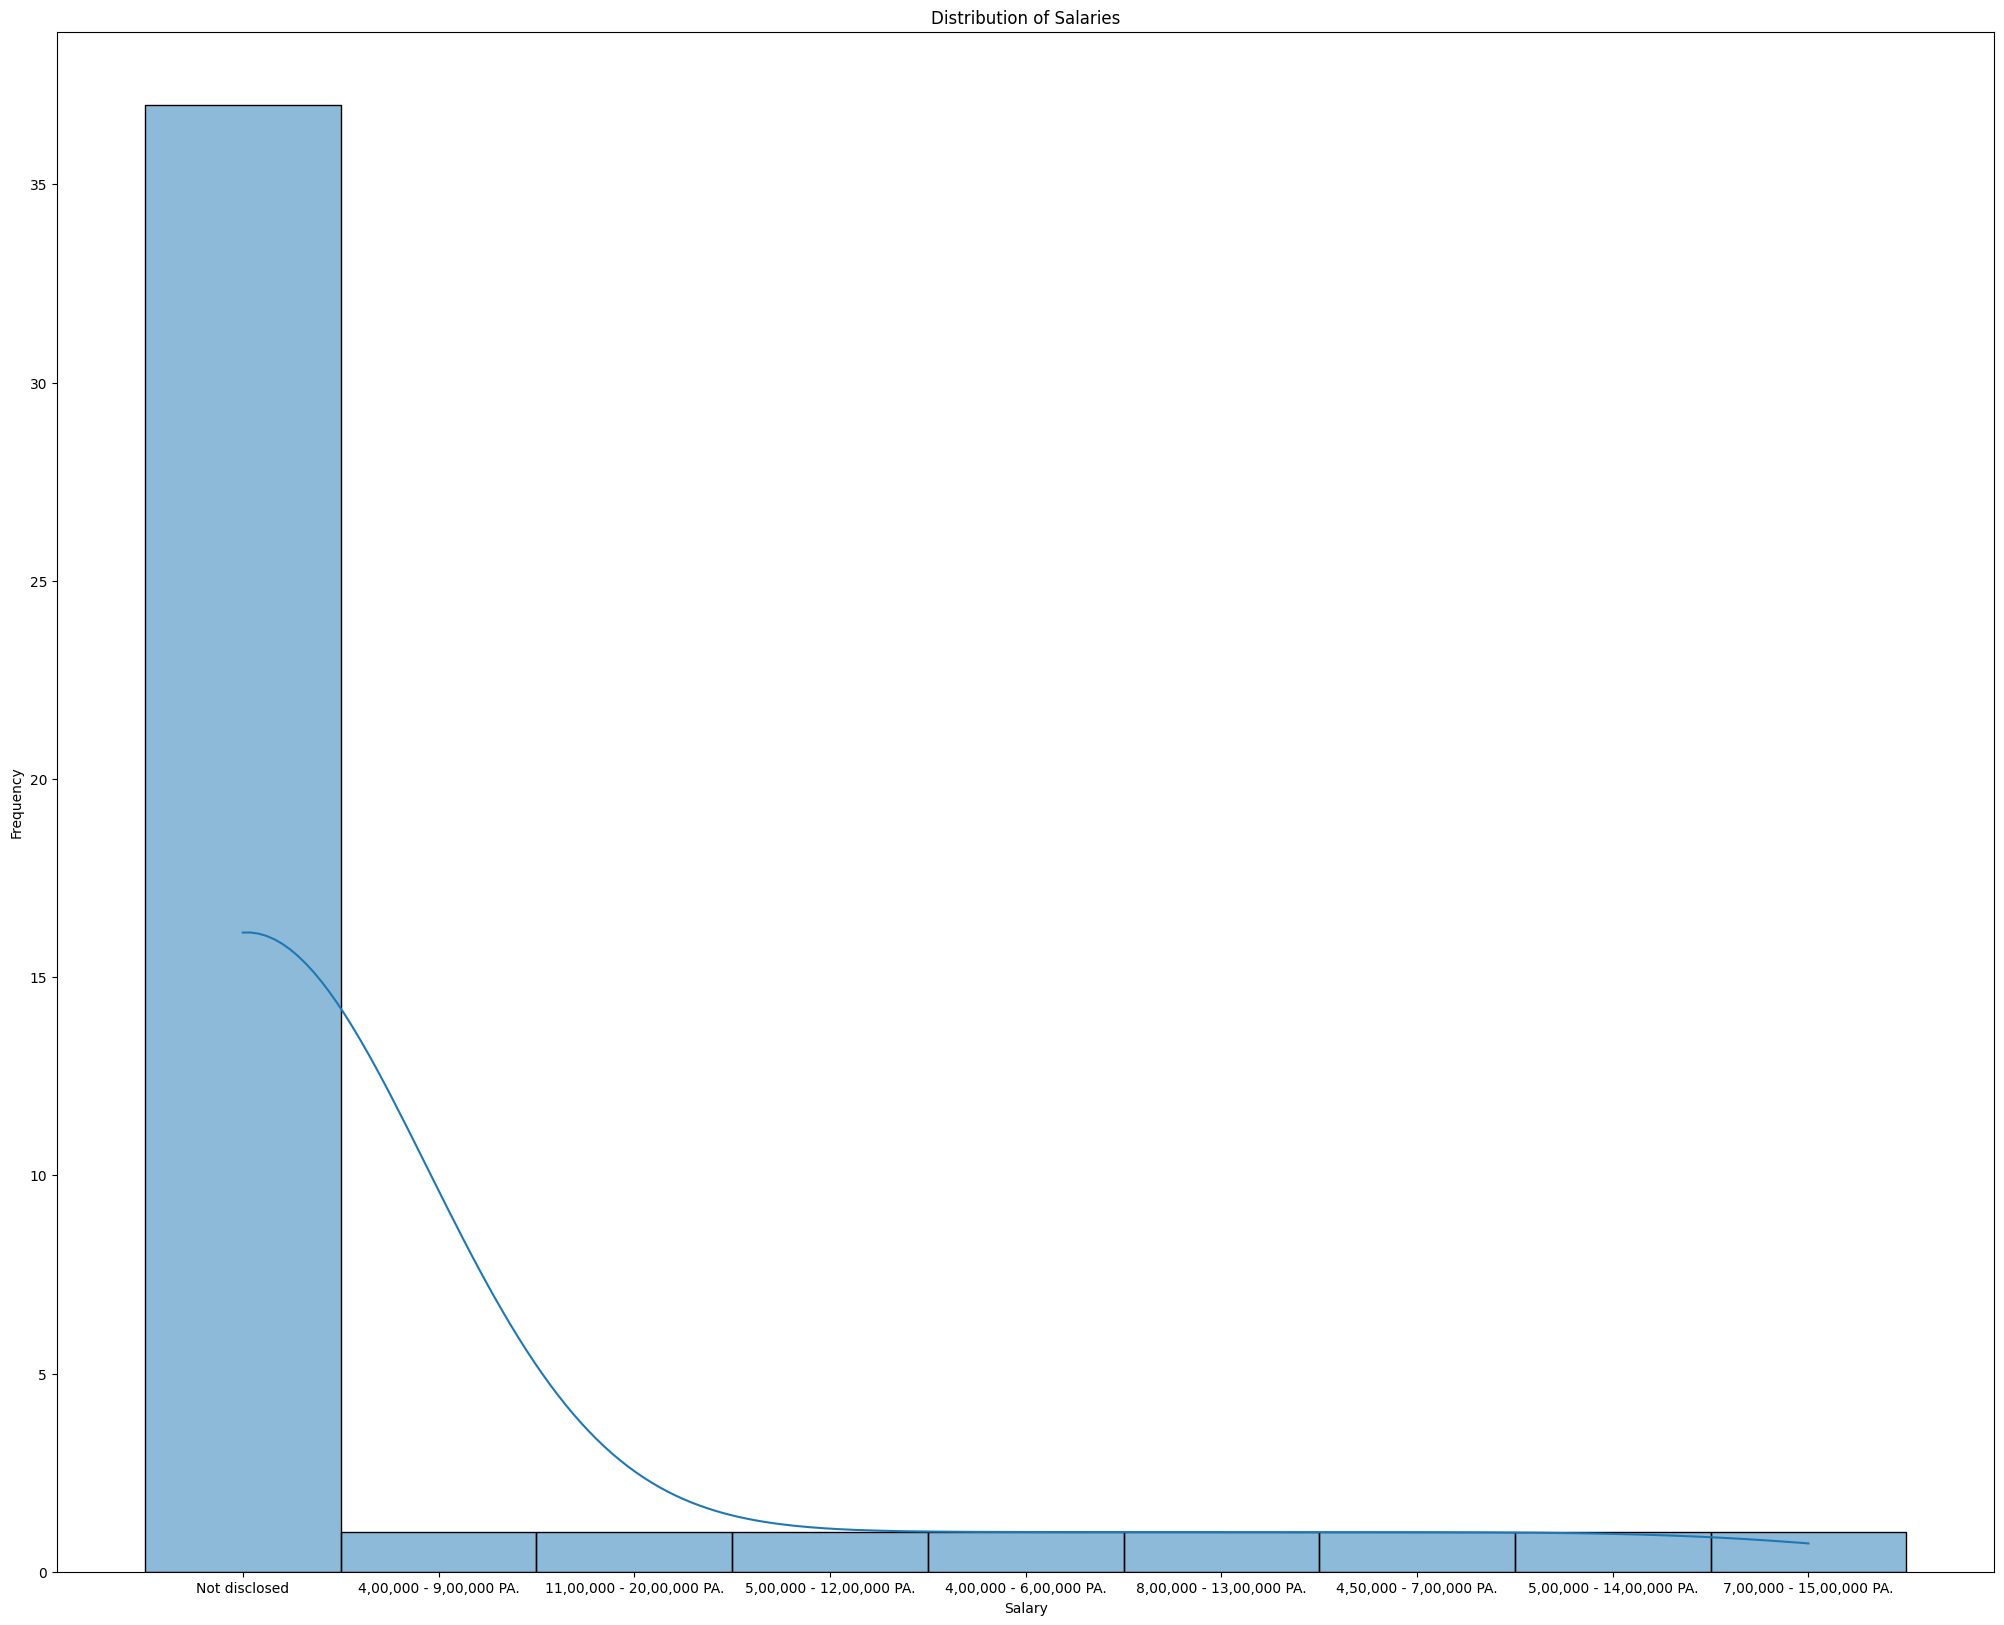

In [299]:
# For 'Salary' column in your DataFrame
plt.figure(figsize=(25, 20))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


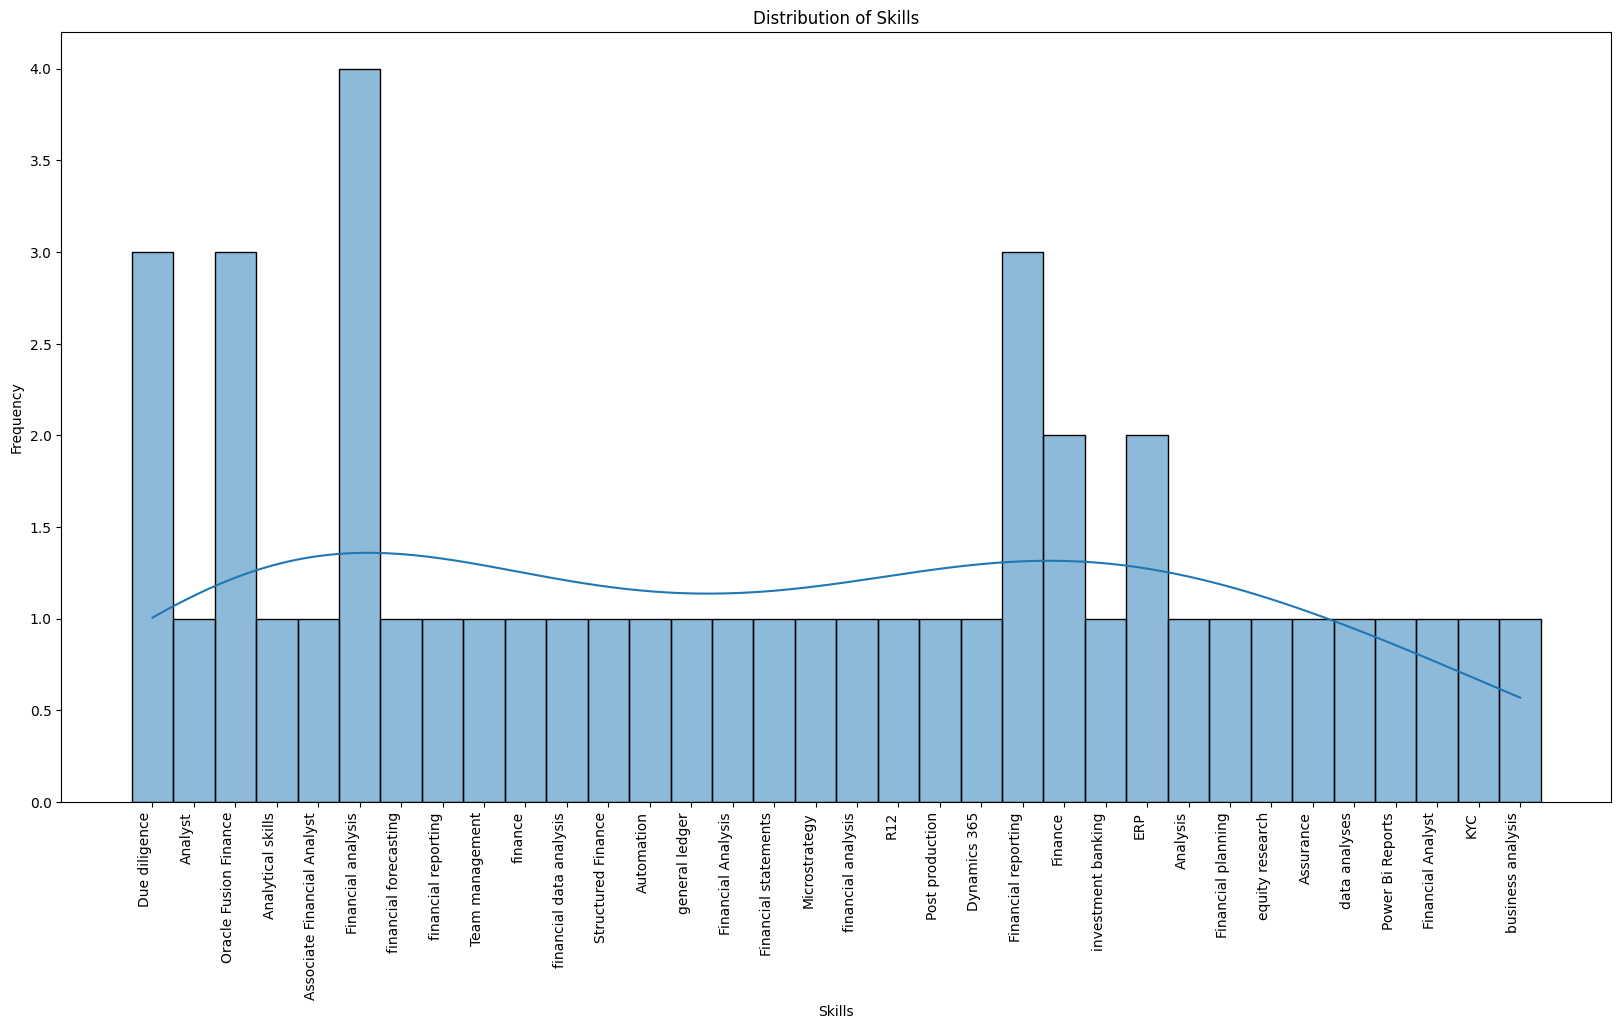

In [300]:
# hist for the 'Skills' is a column in  DataFrame
plt.figure(figsize=(20, 10))
sns.histplot(df['Skills'], kde=True)
plt.title('Distribution of Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


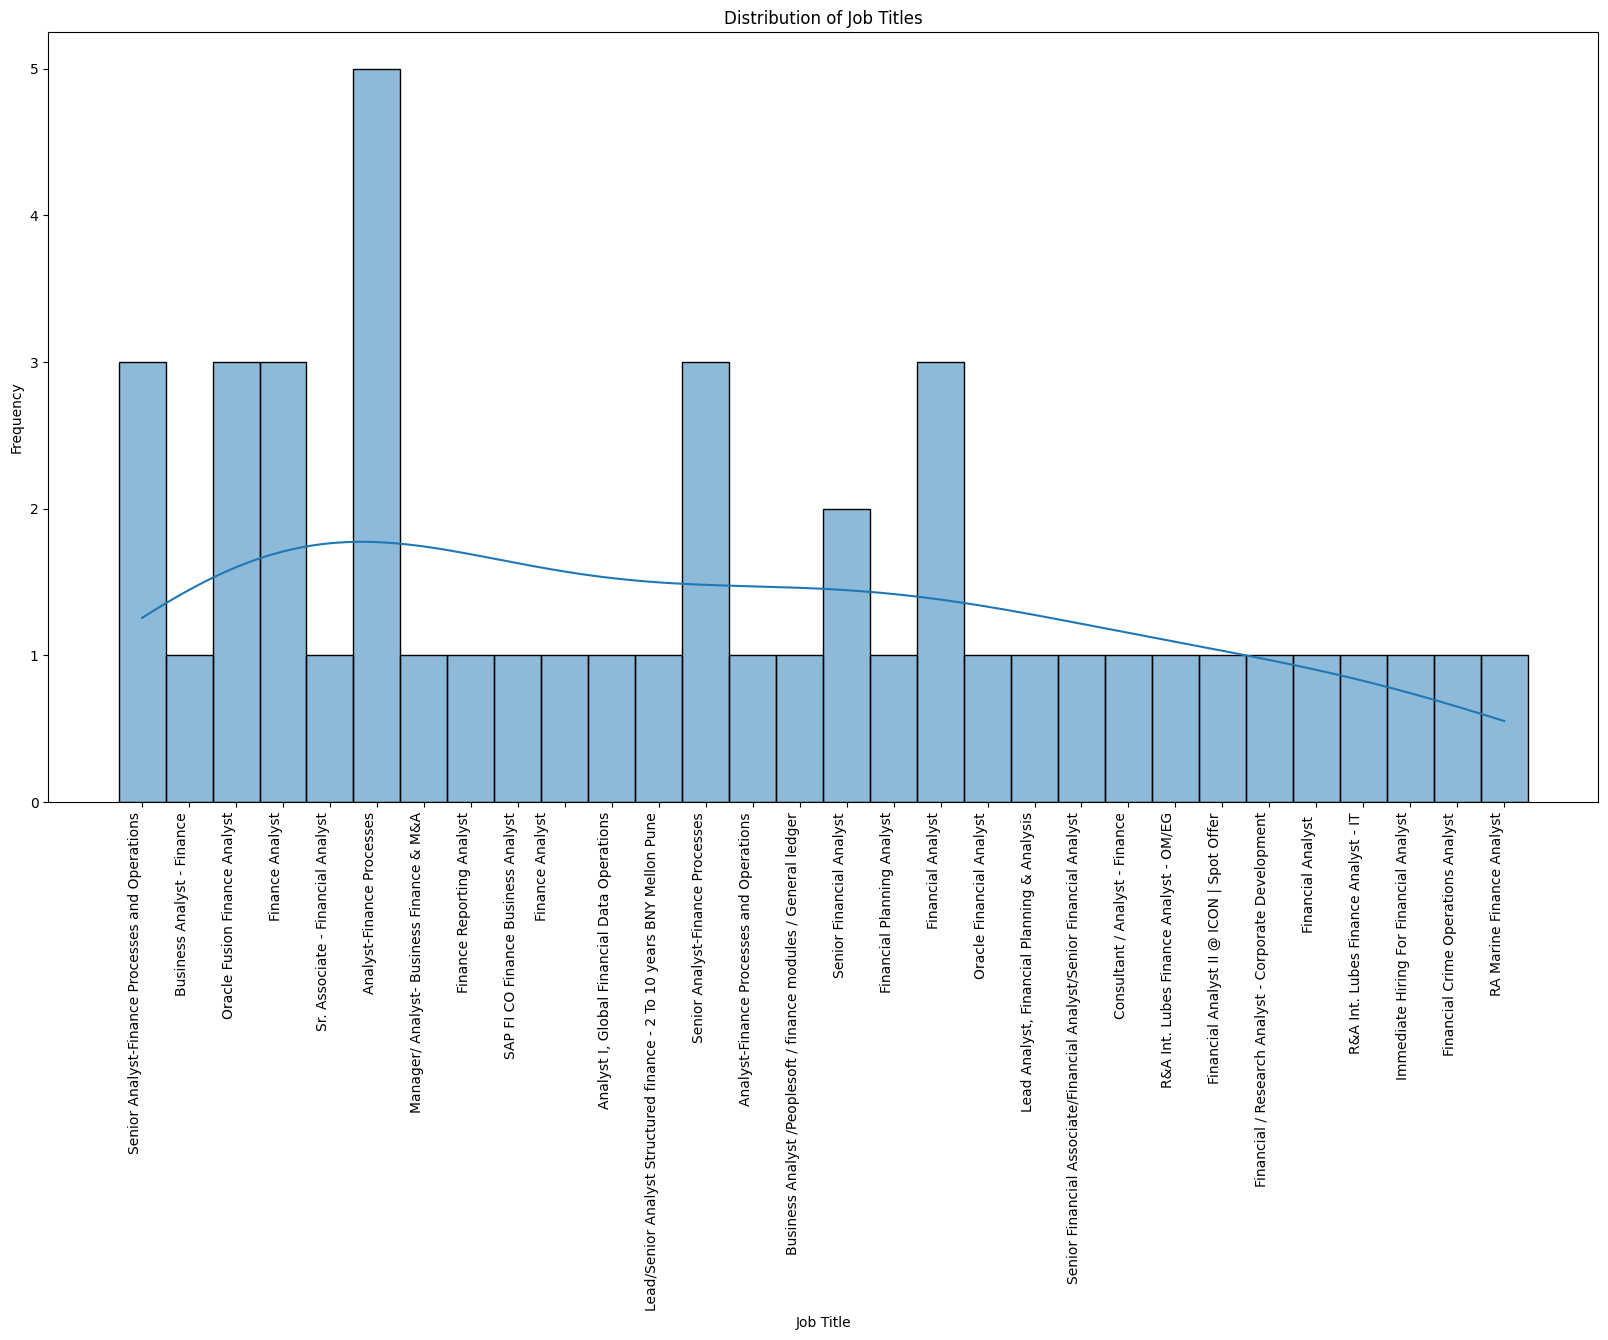

In [301]:
# hist for 'Title' is a column in  DataFrame
plt.figure(figsize=(20, 10))
sns.histplot(df['Title'], kde=True)
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


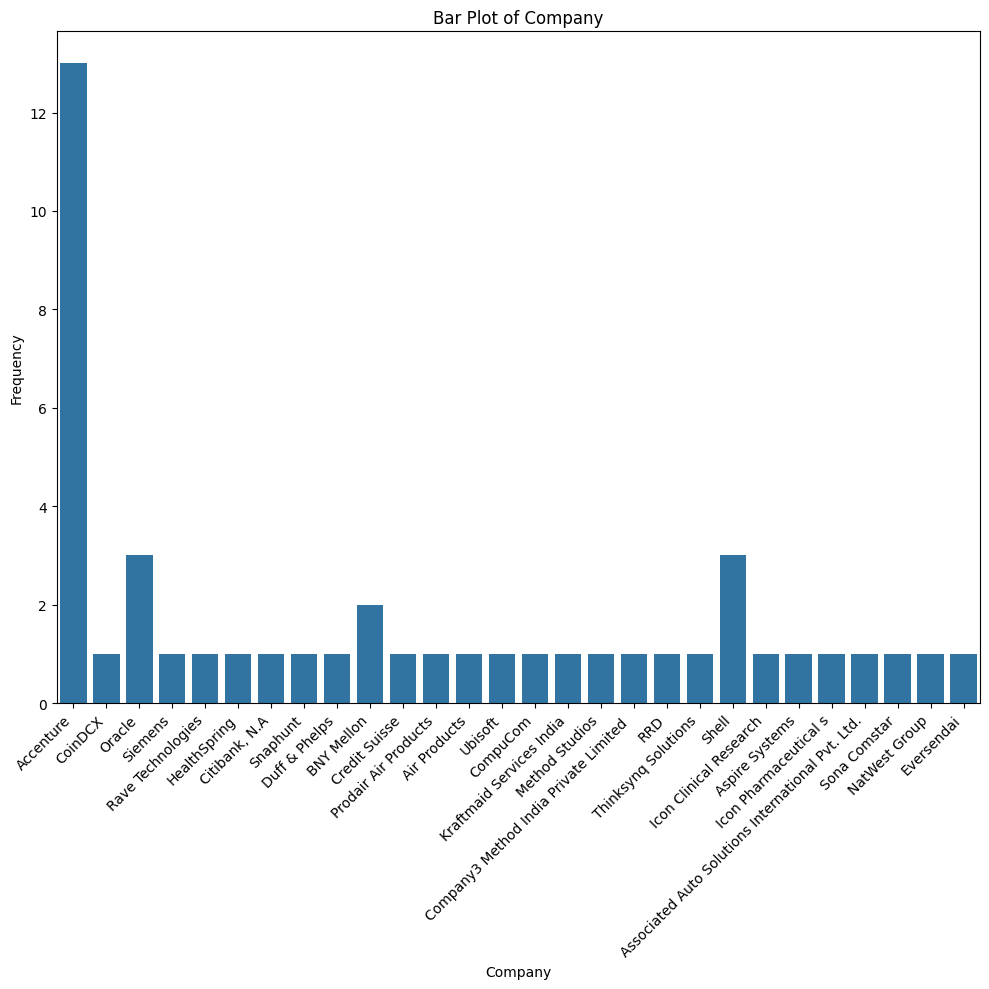

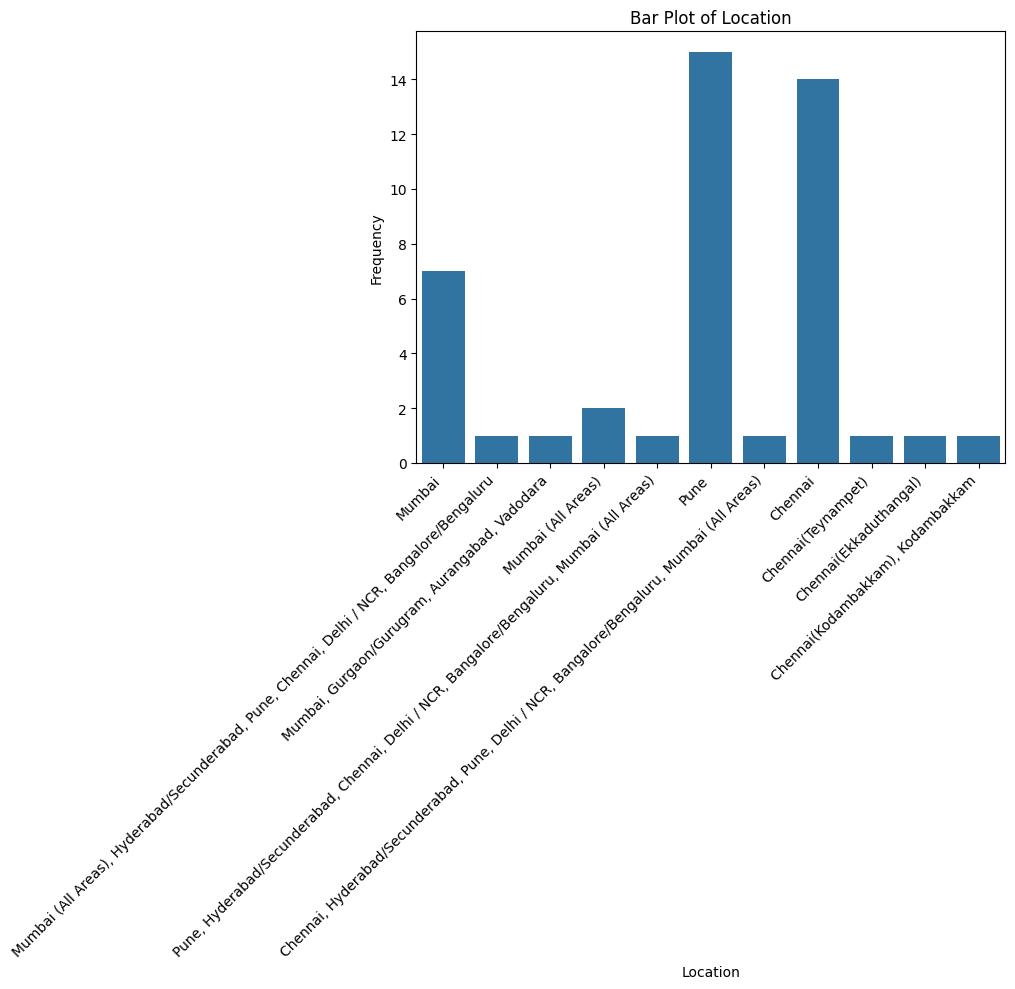

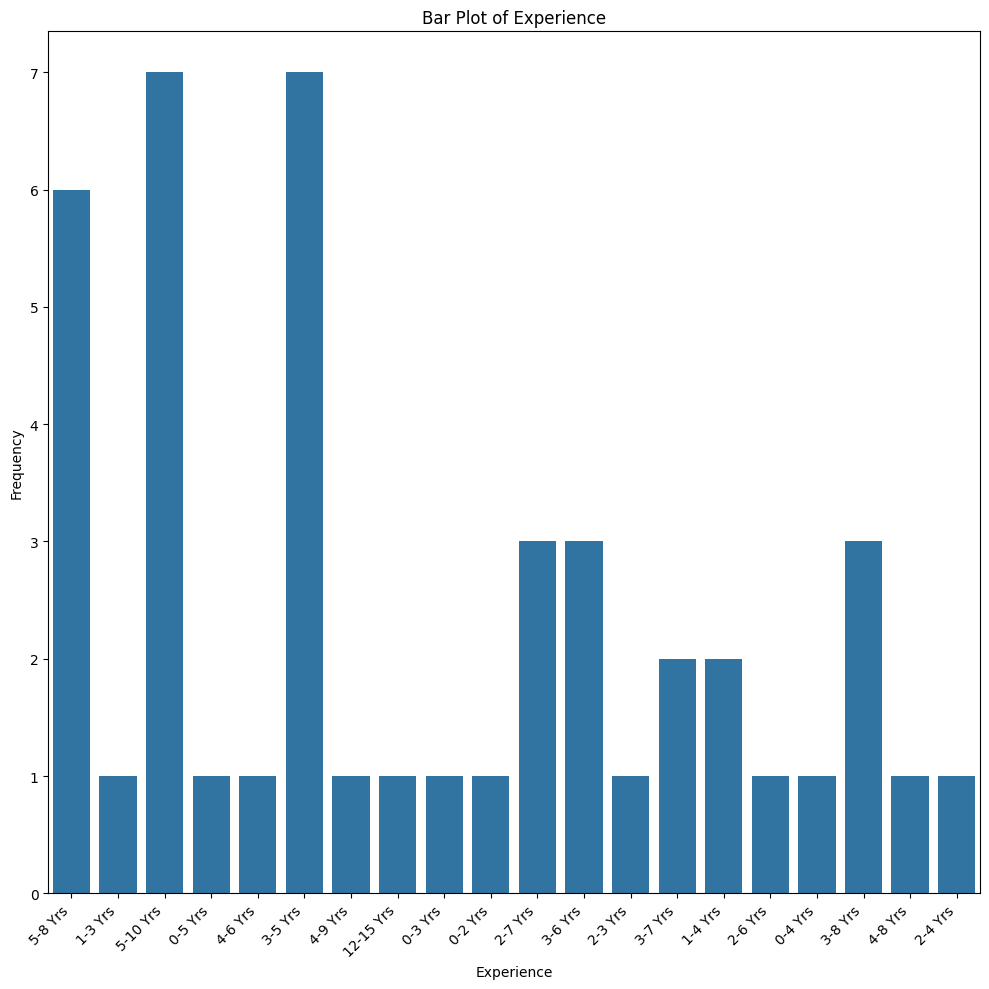

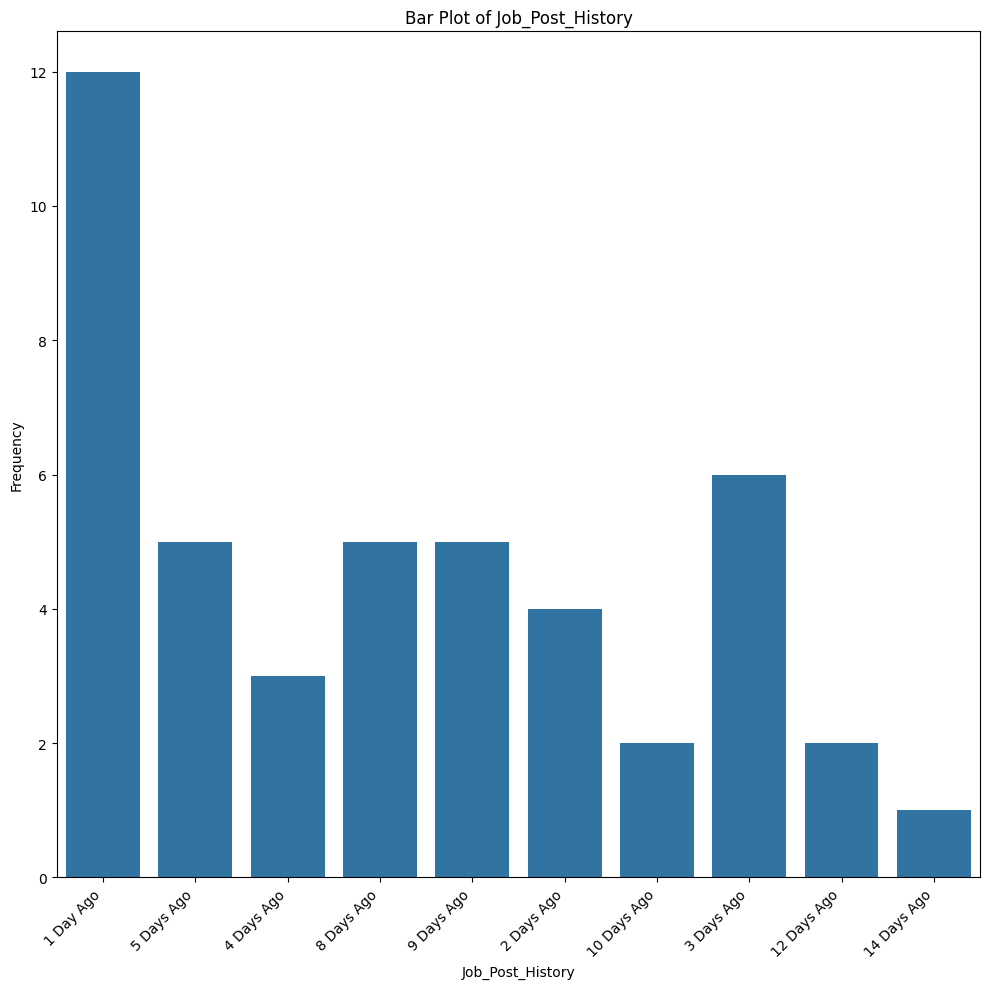

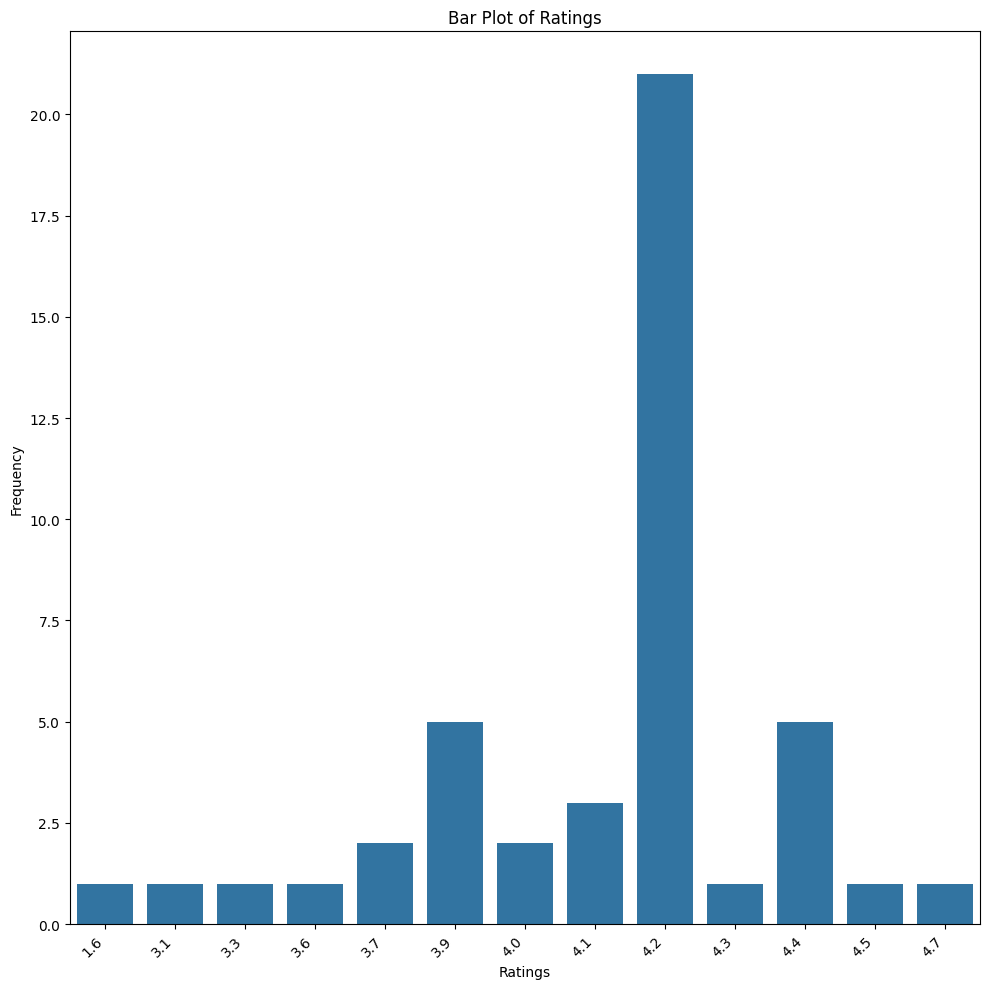

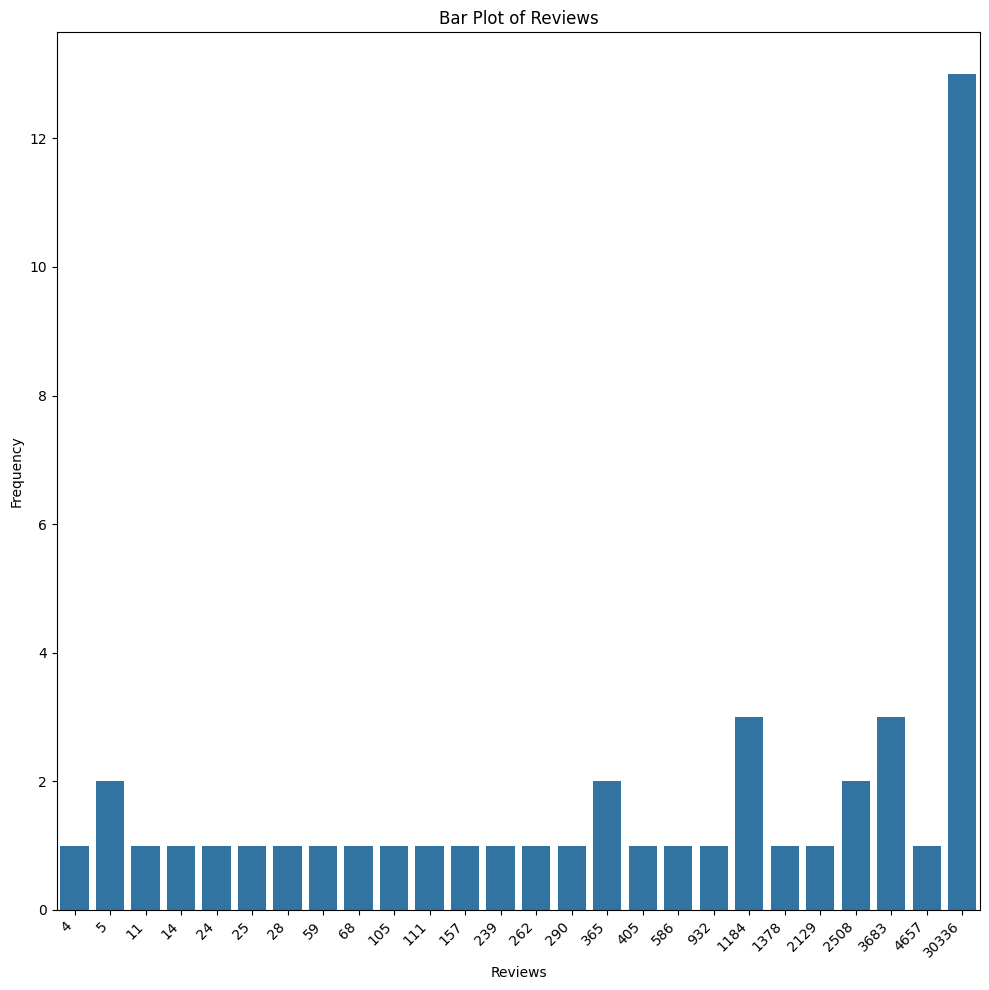

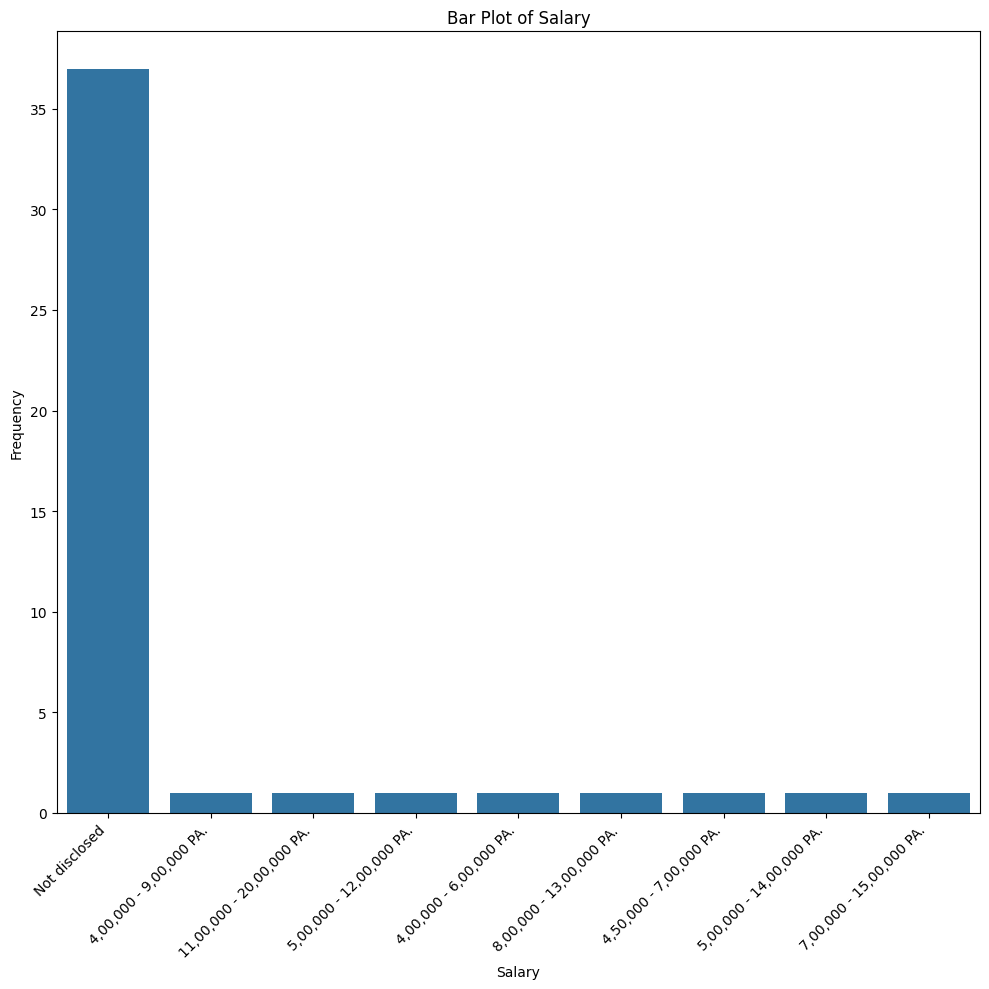

In [302]:
# barplots for the  columns to create barplots
columns_to_plot = ['Company', 'Location','Experience', 'Job_Post_History', 'Ratings', 'Reviews', 'Salary']


for column in columns_to_plot:
    plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    try:
        sns.countplot(x=column, data=df)  # Use countplot for categorical or discrete data
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
    except Exception as e:
        print(f"Error creating barplot for column '{column}': {e}")

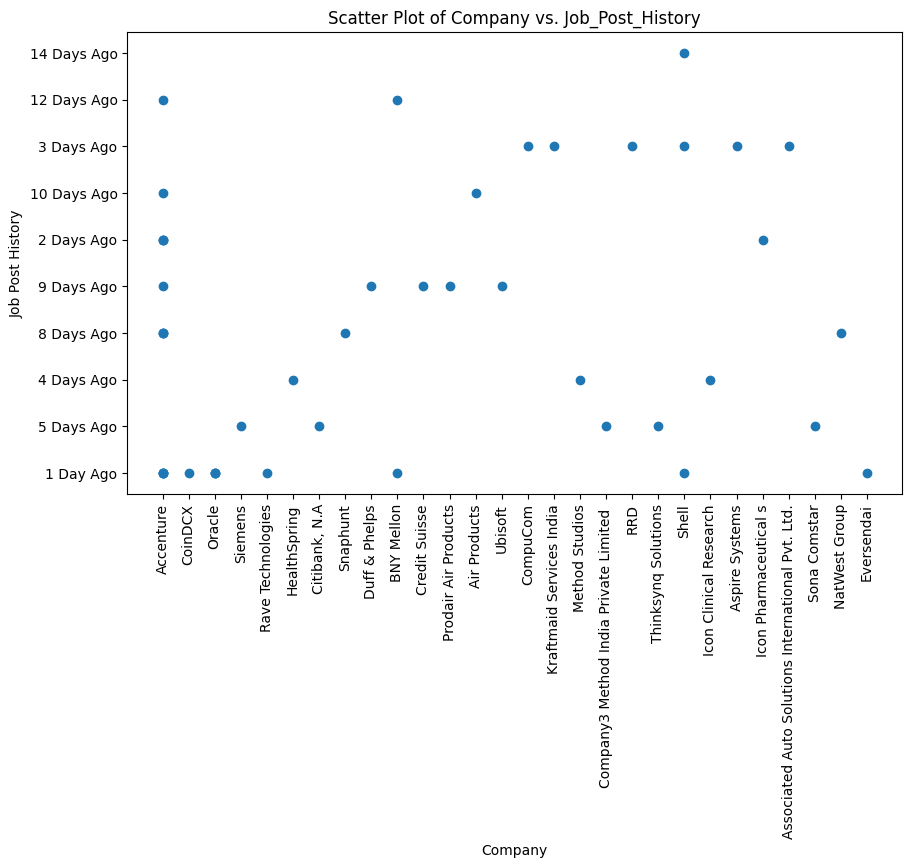

In [303]:
# scatter plots for the 'Company' and 'Job_Post_History' are columns in your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Company'], df['Job_Post_History'])
plt.title('Scatter Plot of Company vs. Job_Post_History')
plt.xlabel('Company')
plt.ylabel('Job Post History')
plt.xticks(rotation=90)
plt.show()

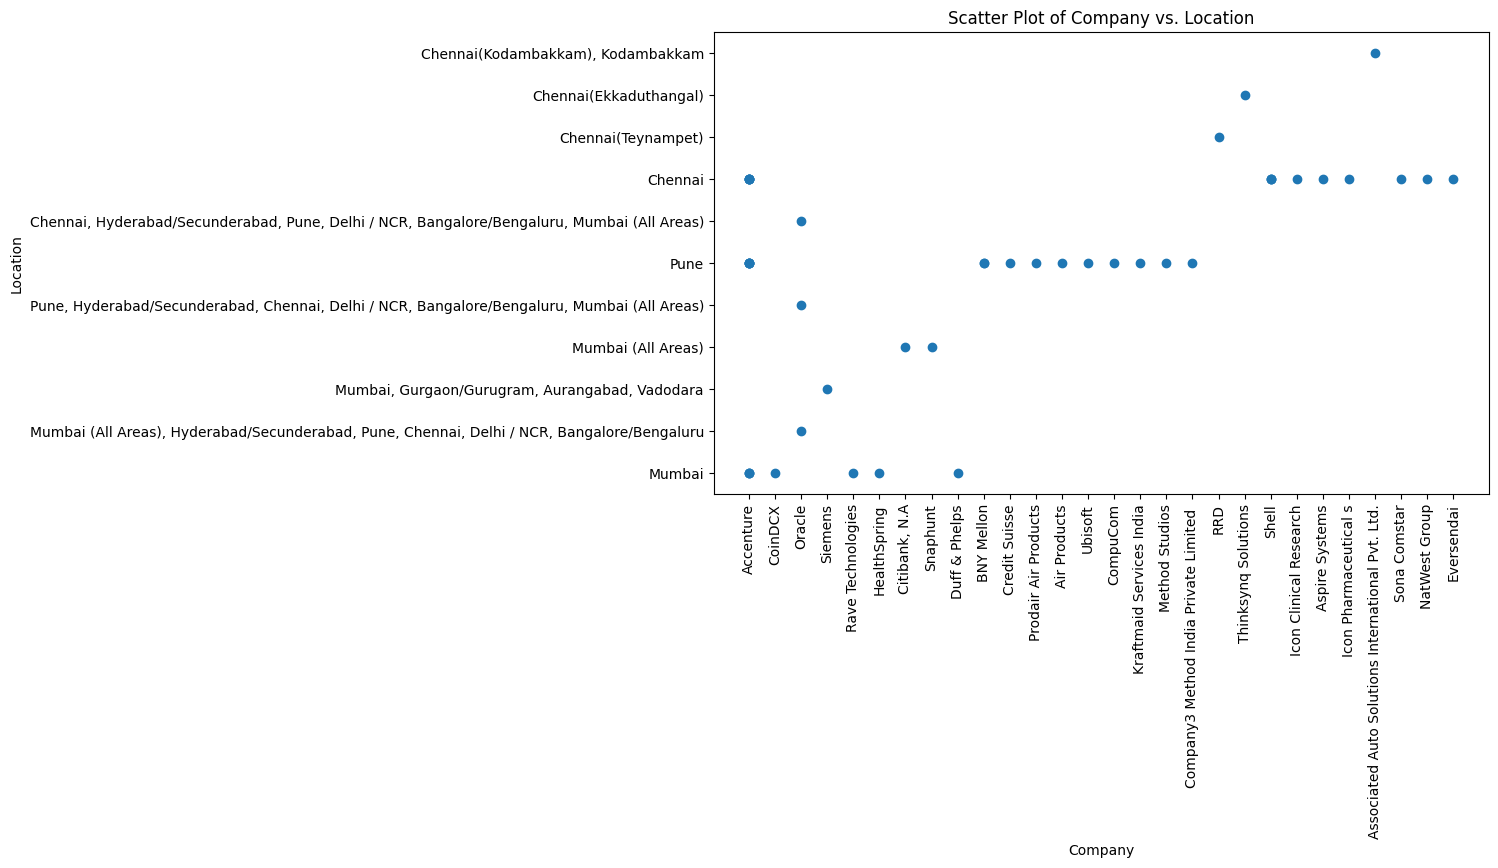

In [304]:
# scatter plot for 'Company' and 'Location' are columns in your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Company'], df['Location'])
plt.title('Scatter Plot of Company vs. Location')
plt.xlabel('Company')
plt.ylabel('Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


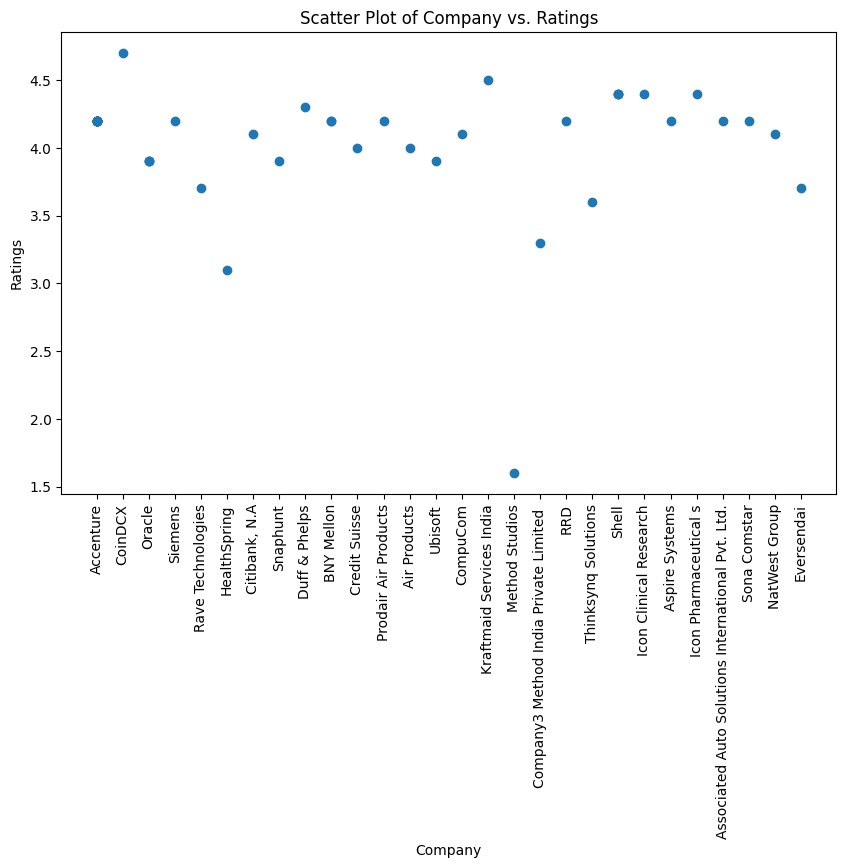

In [305]:
# scatter plot 'Company' and 'Ratings' are columns in your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Company'], df['Ratings'])
plt.title('Scatter Plot of Company vs. Ratings')
plt.xlabel('Company')
plt.ylabel('Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


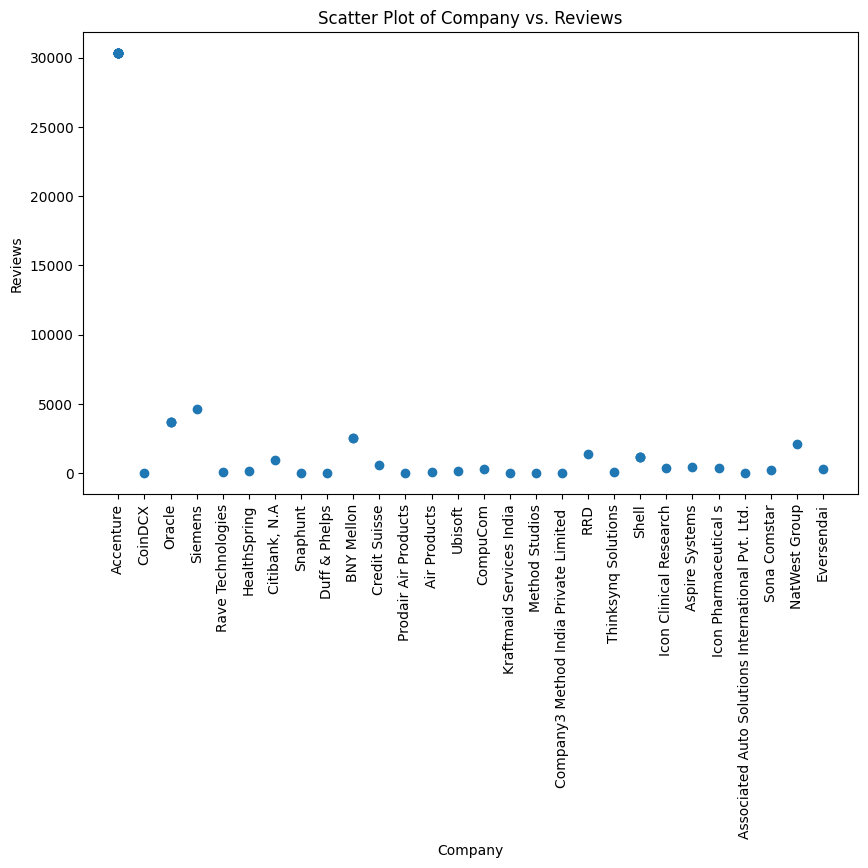

In [306]:
# scatter plot for 'Company' and 'Reviews' are columns in your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Company'], df['Reviews'])
plt.title('Scatter Plot of Company vs. Reviews')
plt.xlabel('Company')
plt.ylabel('Reviews')
plt.xticks(rotation=90)
plt.show()


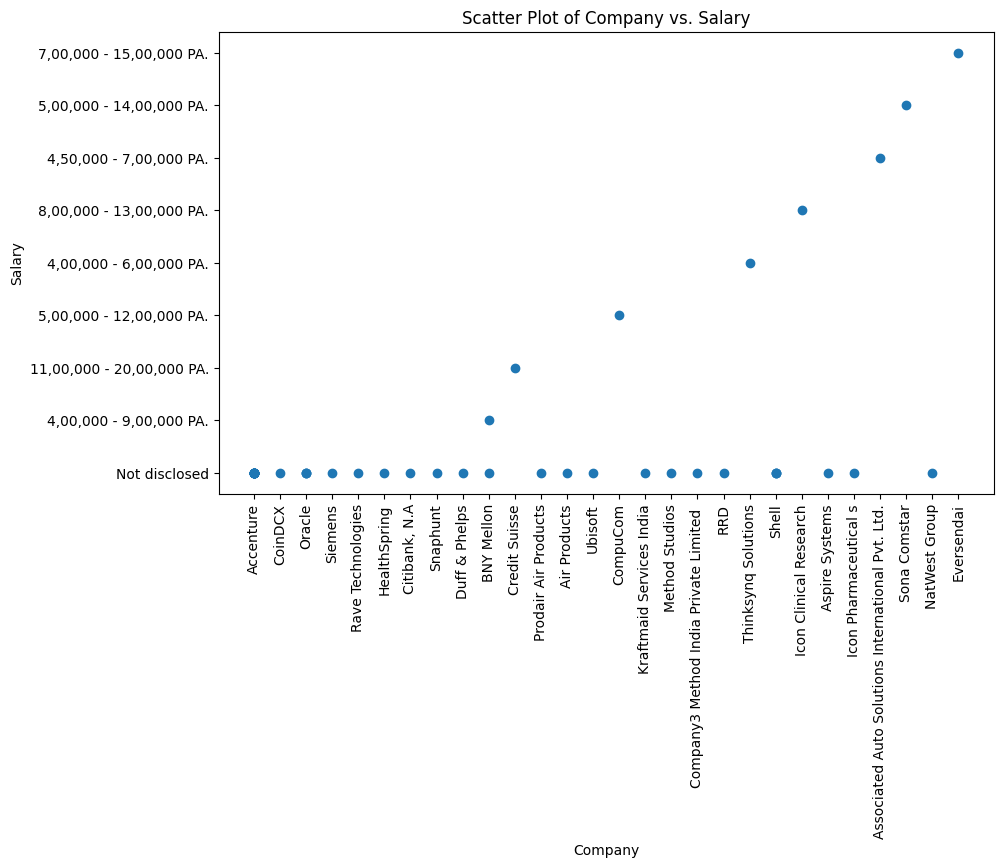

In [307]:
# scatter plot 'Company' and 'Salary' are columns in your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Company'], df['Salary'])
plt.title('Scatter Plot of Company vs. Salary')
plt.xlabel('Company')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


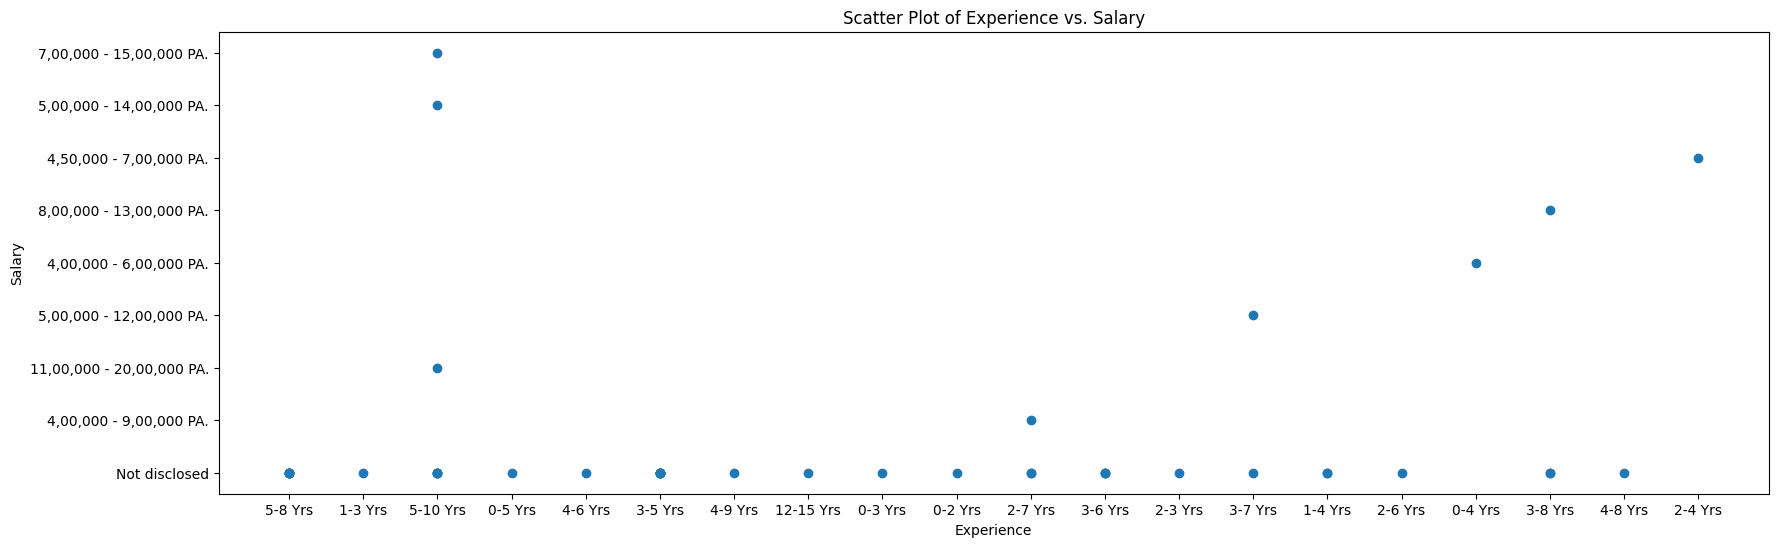

In [308]:
# scatter plot 'Experience' and 'Salary' are columns in your DataFrame
plt.figure(figsize=(20, 6))
plt.scatter(df['Experience'], df['Salary'])
plt.title('Scatter Plot of Experience vs. Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [309]:
# Feature Engineering

# Identifying categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Applying Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [310]:
df

,Company,Experience,Job_Post_History,Location,Ratings,Reviews,Salary,Skills,Title,Experience_Min,Experience_Max,Experience_Avg,Salary_Min,Salary_Max,Salary_Avg
0,0,19,0,5,0.309348,1.563455,8,6,26,0.831508,0.476664,0.656097,-0.429036,-0.432432,-0.433140
20,6,4,0,5,1.380170,-0.708665,8,1,3,-1.137853,-1.509437,-1.387898,-0.429036,-0.432432,-0.433140
40,18,18,0,7,-0.333145,-0.433736,8,18,20,0.831508,1.271105,1.110318,-0.429036,-0.432432,-0.433140
60,23,3,7,8,0.309348,-0.360751,8,2,6,-1.630193,-0.714997,-1.160787,-0.429036,-0.432432,-0.433140
80,21,15,0,5,-0.761473,-0.701846,8,3,29,0.339168,-0.317776,-0.025235,-0.429036,-0.432432,-0.433140
100,0,11,0,5,0.309348,1.563455,8,12,1,-0.153172,-0.714997,-0.479456,-0.429036,-0.432432,-0.433140
120,12,17,6,5,-2.046459,-0.701397,8,30,18,0.339168,0.873885,0.656097,-0.429036,-0.432432,-0.433140
140,5,11,7,6,0.095184,-0.639877,8,31,8,-0.153172,-0.714997,-0.479456,-0.429036,-0.432432,-0.433140
160,0,6,8,5,0.309348,1.563455,8,23,24,4.277889,3.257207,3.835645,-0.429036,-0.432432,-0.433140
180,24,1,8,6,-0.333145,-0.709340,8,27,7,-1.630193,-1.509437,-1.615009,-0.429036,-0.432432,-0.433140


In [311]:
# prompt: save the above ptocessed data as processed_data.csv

import pandas as pd
# Assuming the code you provided is in a cell above and 'df' is the processed DataFrame
df.to_csv('processed_data.csv', index=False)


In [312]:
# Splitting data into features (X) and target (y)
X = df.drop('Salary_Avg', axis=1)
y = df['Salary_Avg']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [313]:
# Classification: Logistic Regression, Random Forest, XGBoost, XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Initializing regressors
logreg_regressor = LinearRegression()
rf_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()
dt_regressor = DecisionTreeRegressor()

# Train regressors
logreg_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)
dt_predictions = dt_regressor.predict(X_test)

# Evaluate regressors using regression metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, logreg_predictions))
print("R-squared:", r2_score(y_test, logreg_predictions))

print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))

print("\nXGBoost Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, xgb_predictions))
print("R-squared:", r2_score(y_test, xgb_predictions))

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, dt_predictions))
print("R-squared:", r2_score(y_test, dt_predictions))


Linear Regression:
Mean Squared Error: 8.753377276305912e-29
R-squared: 1.0

Random Forest Regressor:
Mean Squared Error: 0.0025417018581081786
R-squared: 0.9969793780032034

XGBoost Regressor:
Mean Squared Error: 0.054233491217835765
R-squared: 0.9355475639233288

Decision Tree Regressor:
Mean Squared Error: 0.04043271995399653
R-squared: 0.9519487453283503


In [314]:
# choosing best regressor

model_results = {
    'Linear Regression': {'MSE': mean_squared_error(y_test, logreg_predictions), 'R2': r2_score(y_test, logreg_predictions)},
    'Random Forest Regressor': {'MSE': mean_squared_error(y_test, rf_predictions), 'R2': r2_score(y_test, rf_predictions)},
    'XGBoost Regressor': {'MSE': mean_squared_error(y_test, xgb_predictions), 'R2': r2_score(y_test, xgb_predictions)},
    'Decision Tree Regressor': {'MSE': mean_squared_error(y_test, dt_predictions), 'R2': r2_score(y_test, dt_predictions)}
}

best_model = max(model_results, key=lambda k: model_results[k]['R2'])
print(f"The best performing model is: {best_model} with R-squared: {model_results[best_model]['R2']:.4f}")


The best performing model is: Linear Regression with R-squared: 1.0000


In [315]:
# Clustering: KMeans, DBSCAN

from sklearn.cluster import KMeans, DBSCAN

# Select features for clustering
features_for_clustering = ['Experience_Avg', 'Reviews', 'Ratings']
X_cluster = df[features_for_clustering]

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=35)
df['kmeans_cluster'] = kmeans.fit_predict(X_cluster)
print("KMeans Clustering Results:")
print(df['kmeans_cluster'].value_counts())

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_cluster)
print("\nDBSCAN Clustering Results:")
print(df['dbscan_cluster'].value_counts())


KMeans Clustering Results:
kmeans_cluster
0    32
2    12
1     1
Name: count, dtype: int64

DBSCAN Clustering Results:
dbscan_cluster
 3    14
-1    12
 1     7
 0     6
 2     6
Name: count, dtype: int64


In [316]:
# model trainig
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [317]:
#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 8.753377276305912e-29
Root Mean Squared Error (RMSE): 9.355948522894892e-15
Mean Absolute Error (MAE): 8.678243309153307e-15
R-squared (R2): 1.0


In [318]:
# Hyperparameter Tuning
# Improving performance using GridSearchCV or RandomizedSearchCV.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=40)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and R-squared score
print("Best Hyperparameters (GridSearchCV):", grid_search.best_params_)
print("Best R-squared Score (GridSearchCV):", grid_search.best_score_)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and R-squared score
print("\nBest Hyperparameters (RandomizedSearchCV):", random_search.best_params_)
print("Best R-squared Score (RandomizedSearchCV):", random_search.best_score_)

# Evaluate the best model from GridSearchCV on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("\nBest Model (GridSearchCV) R-squared on Test Set:", r2_best)


Best Hyperparameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared Score (GridSearchCV): 0.3699567947730269

Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best R-squared Score (RandomizedSearchCV): 0.31072215765687317

Best Model (GridSearchCV) R-squared on Test Set: 0.9955833799827503


In [319]:
# prompt: find accuracy score for all models

# Assuming model_results dictionary from the provided code is available

for model_name, metrics in model_results.items():
    print(f"{model_name}: R-squared = {metrics['R2']:.4f}")


Linear Regression: R-squared = 1.0000
Random Forest Regressor: R-squared = 0.9970
XGBoost Regressor: R-squared = 0.9355
Decision Tree Regressor: R-squared = 0.9519
